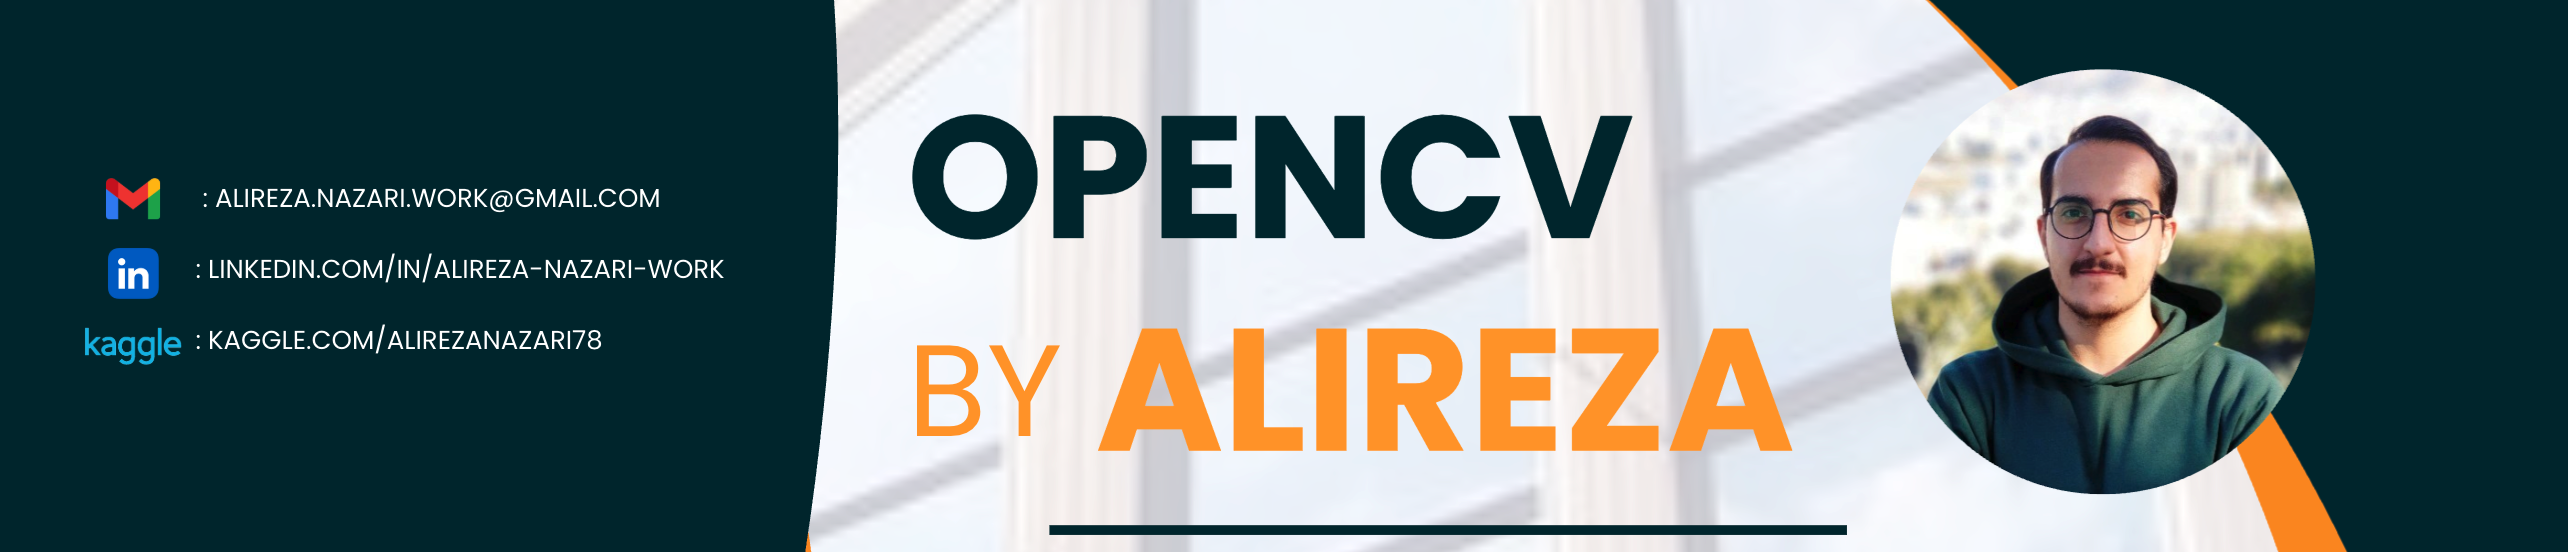

## 48 - Moments, Sorting Contours

**In this lesson we'll learn:**
1. Sort Contours by Area
2. Sort by Left to Right (Great for OCR) 
3. Approximate Contours 
4. Convex Hull

In [29]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

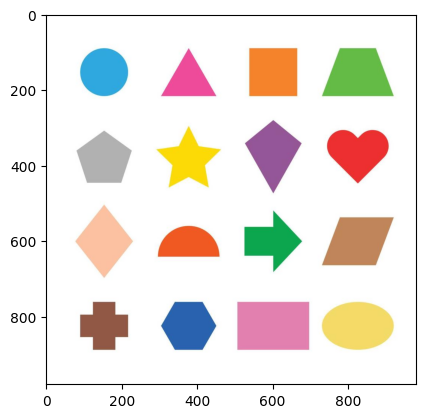

In [30]:
# Load our image
image = cv2.imread('/Users/alireza/Coding/OpenCV_Learning/OpenCV_Learnings/Images/shapes.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)



Number of contours found =  16


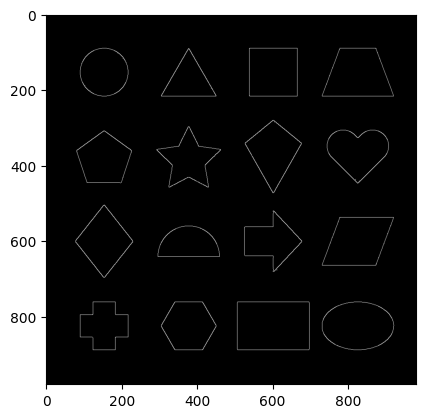

In [31]:
# Grayscale our image
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# Find Canny edges
edged = cv2.Canny(gray, 50, 200)
plt.imshow(edged , cmap='gray')

# Find contours and print how many were found
contours, hierarchy = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print("Number of contours found = ", len(contours))



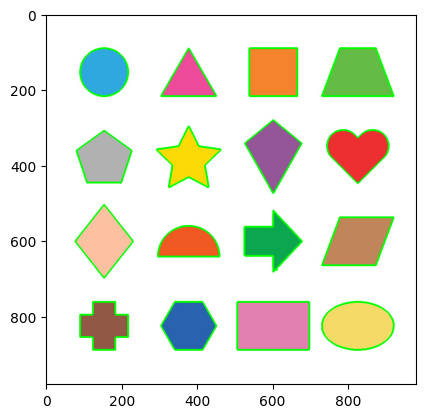

In [32]:
# Draw all contours over blank image
cv2.drawContours(image, contours, -1, (0,255,0), 3)
plt.imshow(image)

## Sorting by Area using cv2.ContourArea and cv2.Moments

Contor Areas before sorting...
[19003.0, 24251.0, 14009.0, 11513.0, 10436.0, 18120.0, 149.5, 15016.0, 13965.5, 15120.0, 12046.0, 14704.0, 9381.0, 18117.0, 16128.0, 12682.0]
Contor Areas after sorting...
[24251.0, 19003.0, 18120.0, 18117.0, 16128.0, 15120.0, 15016.0, 14704.0, 14009.0, 13965.5, 12682.0, 12046.0, 11513.0, 10436.0, 9381.0, 149.5]


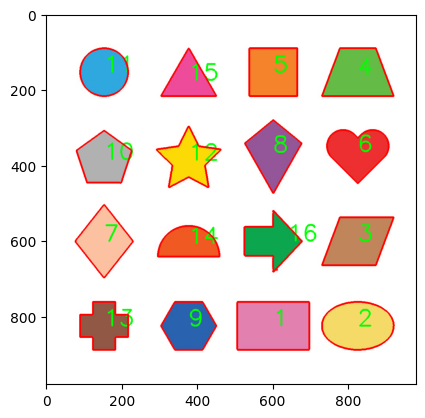

In [33]:
# Function we'll use to display contour area

def get_contour_areas(contours):
    """returns the areas of all contours as list"""
    all_areas = []
    for cnt in contours:
        area = cv2.contourArea(cnt)
        all_areas.append(area)
    return all_areas

# Load our image
image = cv2.imread('/Users/alireza/Coding/OpenCV_Learning/OpenCV_Learnings/Images/shapes.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

# Let's print the areas of the contours before sorting
print("Contor Areas before sorting...")
print(get_contour_areas(contours))

# Sort contours large to small by area
sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)

print("Contor Areas after sorting...") 
print(get_contour_areas(sorted_contours))

# Iterate over our contours and draw one at a time
for (i,c) in enumerate(sorted_contours):
    M = cv2.moments(c)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    cv2.putText(image, str(i+1), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)
    cv2.drawContours(image, [c], -1, (255,0,0), 3)
plt.imshow(image)

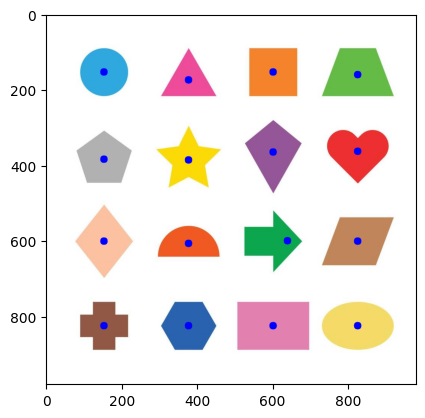

In [34]:
def x_cord_contour(contours):
    """Returns the X cordinate for the contour centroid"""
    if cv2.contourArea(contours) > 10:
        M = cv2.moments(contours)
        return (int(M['m10']/M['m00']))
    else:
        pass
    
def label_contour_center(image, c):
    """Places a red circle on the centers of contours"""
    M = cv2.moments(c)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    
    # Draw the countour number on the image
    cv2.circle(image,(cx,cy), 10, (0,0,255), -1)
    return image

# Load our image
image = cv2.imread('/Users/alireza/Coding/OpenCV_Learning/OpenCV_Learnings/Images/shapes.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
orginal_image = image.copy()

# Computer Center of Mass or centroids and draw them on our image
for (i, c) in enumerate(contours):
    orig = label_contour_center(image, c)
 
# Showing the Contour centers
plt.imshow( image)

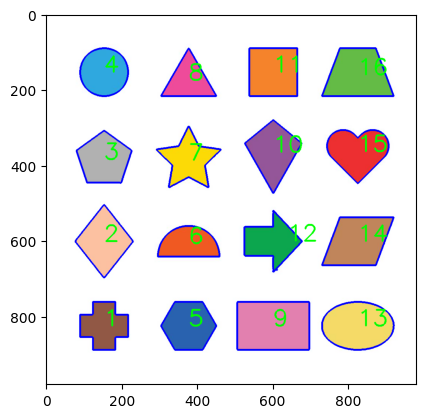

In [35]:
# Sort by left to right using our x_cord_contour function
contours_left_to_right = sorted(contours, key = x_cord_contour, reverse = False)

# Labeling Contours left to right
for (i,c)  in enumerate(contours_left_to_right):
    cv2.drawContours(orginal_image, [c], -1, (0,0,255), 3)  
    M = cv2.moments(c)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    cv2.putText(orginal_image, str(i+1), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)
    (x, y, w, h) = cv2.boundingRect(c)  

plt.imshow( orginal_image)

#### Source:

https://www.udemy.com/course/modern-computer-vision/?srsltid=AfmBOooxRBer_tOv59XXnIduo8QXtrSzRTz1dr3oNS7YRayItH9IfdEi